## Client term deposit subscription

### Import Libraries

In [139]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing the dataset

In [140]:
df=pd.read_csv('term_deposit.csv')

In [141]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


### Check data info

In [142]:
df.shape

(45211, 17)

In [143]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

### No missing values in the dataset

### We have 45211 rows and 17 columns

### Our task is to predict the variable y which has two categories yes/no.

#### Rename the dependent variable

In [144]:
df.rename(columns={'y':'subscribed'},inplace=True)

In [145]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [146]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [147]:
df.size

768587

### Replace yes/no categories with 1=Yes,0=No in the subscribed variable

In [148]:
df['subscribed'].replace({'yes':1,'no':0},inplace=True)

In [149]:
df['subscribed']

0        0
1        0
2        0
3        0
4        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: subscribed, Length: 45211, dtype: int64

In [150]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


In [151]:
df['subscribed'].value_counts()

0    39922
1     5289
Name: subscribed, dtype: int64

#### Our dependent feature(subscribed) is imbalanced with about 11.69% of records having label = 1

## Data analysis

### 1. Age

In [152]:
df['age']

0        58
1        44
2        33
3        47
4        33
         ..
45206    51
45207    71
45208    72
45209    57
45210    37
Name: age, Length: 45211, dtype: int64

In [153]:
df['age'].value_counts()

32    2085
31    1996
33    1972
34    1930
35    1894
      ... 
90       2
92       2
93       2
95       2
94       1
Name: age, Length: 77, dtype: int64

#### Check the distribution of the age feature with distplot

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'Age'), Text(0, 0.5, 'Count')]

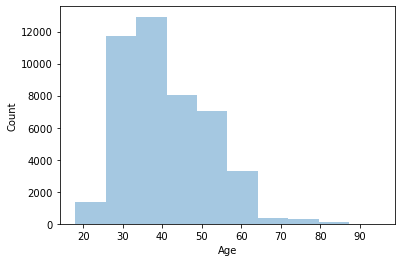

In [154]:
sns.distplot(df['age'],kde=False,bins=10).set(xlabel='Age',ylabel='Count')

In [155]:
df['age'].mean()

40.93621021432837

### Check subscriptions for age around mean value.

In [156]:
df[(df['age']>41) & (df['subscribed']==1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,1
270,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,1
45204,73,retired,married,secondary,no,2850,no,no,cellular,17,nov,300,1,40,8,failure,1
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,1


In [157]:
df[(df['age']<41) & (df['subscribed']==1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
446,39,technician,single,unknown,no,45248,yes,no,unknown,6,may,1623,1,-1,0,unknown,1
457,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,1
474,34,admin.,married,secondary,no,869,no,no,unknown,6,may,1677,1,-1,0,unknown,1
569,28,services,single,secondary,no,5090,yes,no,unknown,6,may,1297,3,-1,0,unknown,1
624,30,technician,married,secondary,no,484,yes,no,unknown,6,may,703,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45197,36,management,single,secondary,no,1511,yes,no,cellular,16,nov,270,1,-1,0,unknown,1
45200,38,technician,married,secondary,no,557,yes,no,cellular,16,nov,1556,4,-1,0,unknown,1
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,1
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,1


### We can see that 2957 customers have subscribed to term deposits and have age<41(mean).
### Also, 2212 customers have subscribed to term deposits having age>41(mean).

#### Boxplot 

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

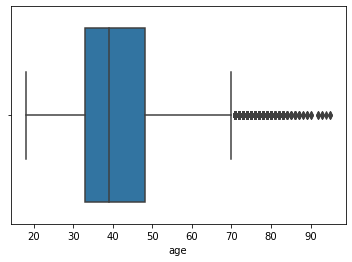

In [158]:
sns.boxplot(df['age'],orient='h')

### Median of age variable is around 40
### Hence, our median is more towards the lower side of interquartile range(25-75 percentile).
### We can also see some outliers based on the boxplot which lie above 70.

#### -----------------------------------

### 2.Job

#### This is a categorical feature

In [159]:
df['job']

0          management
1          technician
2        entrepreneur
3         blue-collar
4             unknown
             ...     
45206      technician
45207         retired
45208         retired
45209     blue-collar
45210    entrepreneur
Name: job, Length: 45211, dtype: object

In [160]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

### Countplot to check subscription based on job

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='job', ylabel='count'>

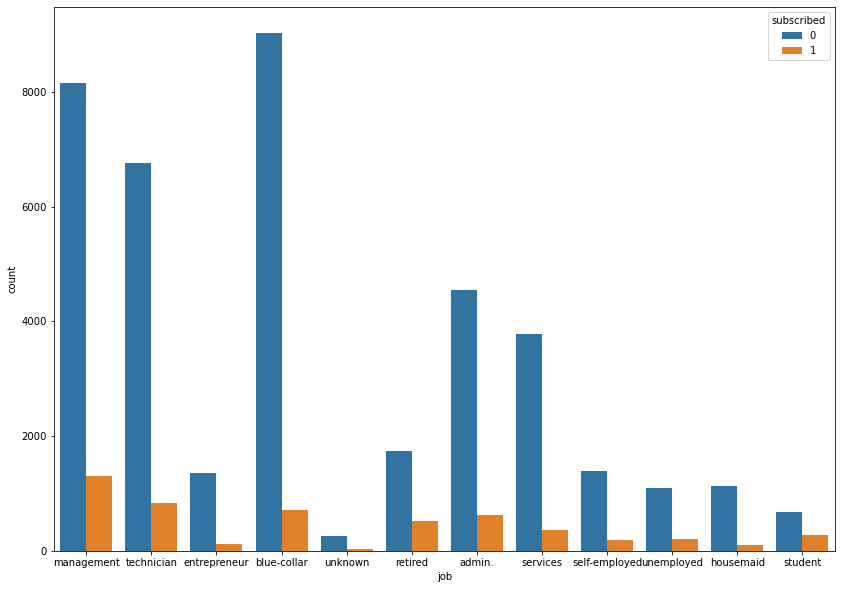

In [161]:
plt.figure(figsize=(14,10))
sns.countplot(df['job'],hue=df['subscribed'])

### We have more customers with job as blue-collar and management jobs.
### We can also observe that management(job) have more number of subscribers of term deposit.
### We have more number of unsubscribed customers from blue-collar and management.
### We can also see that in each category unsubscribed customers are more.
### Clients with job as technician have 2nd highest number of subscriptions.
### Students have a better subscribed to not subscribed ratio.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='job', ylabel='age'>

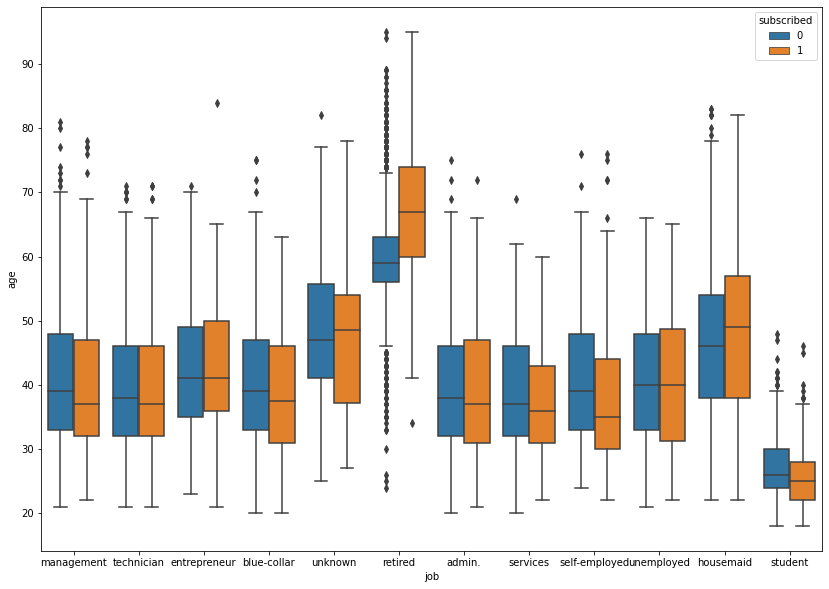

In [162]:
plt.figure(figsize=(14,10))
sns.boxplot(df['job'],df['age'],hue=df['subscribed'])

### We can see that the boxplot has helped us in capturing outliers in the retired category as person above 70 and below 45 years of age is shown to be retired.
### Also for the student category we can see a few outliers above 33 years of age.

<AxesSubplot:xlabel='job', ylabel='age'>

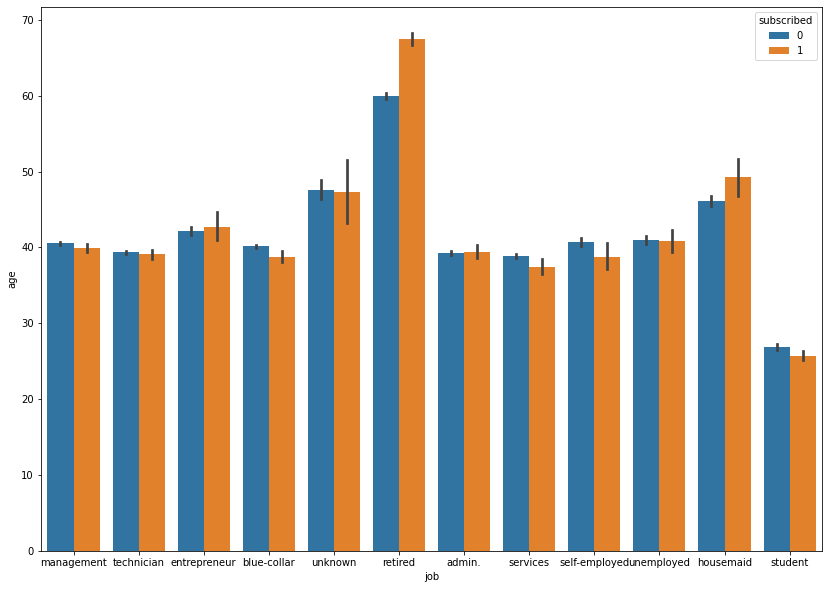

In [163]:
plt.figure(figsize=(14,10))
sns.barplot(x=df['job'],y=df['age'],hue=df['subscribed'])

#### The thin black bars in the above plot indicate the errors or uncertainty in measurement. 
#### Unknown job category has greater uncertainty in measurement while clients in management job category and student have very few errors.

### 3. Marital status 

In [164]:
df['marital'].value_counts()

married     27214
single      12790
divorced     5207
Name: marital, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='marital', ylabel='count'>

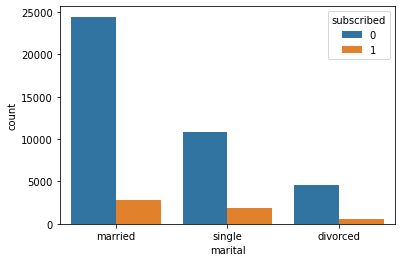

In [165]:
sns.countplot(df['marital'],hue=df['subscribed'])

### We can see that most of the customers are married and most of them have not subscribed to term deposits so the bank can come up with good offers for these customers. 

### 4. Education

In [166]:
df['education'].value_counts()

secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

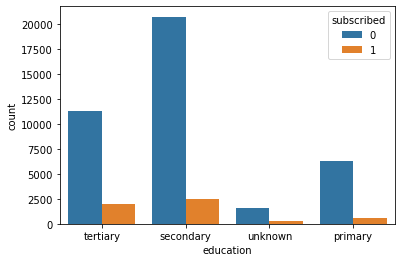

In [167]:
sns.countplot(df['education'],hue=df['subscribed'])

### We have more customers with secondary education followed by tertiary and primary education levels.

In [168]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


### 5. Credit defaulters

In [169]:
df['default'].value_counts()

no     44396
yes      815
Name: default, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='default', ylabel='count'>

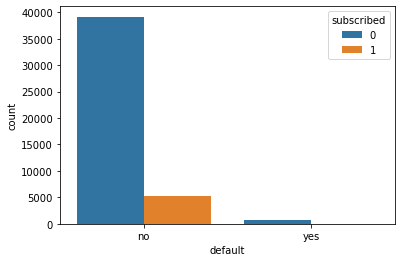

In [170]:
sns.countplot(df['default'],hue=df['subscribed'])

### We can see that most of the customers are not defaulters which is great!!
### Defaulting customers have not subscribed to term deposits.

In [171]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


### 6. balance

In [172]:
df['balance']

0        2143
1          29
2           2
3        1506
4           1
         ... 
45206     825
45207    1729
45208    5715
45209     668
45210    2971
Name: balance, Length: 45211, dtype: int64

In [173]:
df['balance'].max()

102127

In [174]:
df['balance'].min()

-8019

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 0, 'balance'), Text(0, 0.5, 'count')]

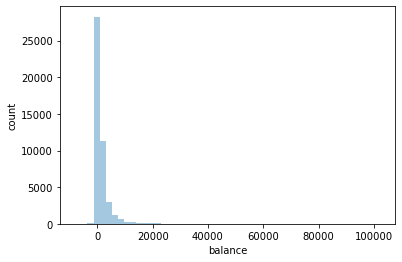

In [175]:
sns.distplot(df['balance'],kde=False).set(xlabel='balance',ylabel='count')

In [176]:
df[(df['balance']<0) & (df['subscribed']==1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
891,53,services,divorced,primary,no,-291,yes,yes,unknown,7,may,591,1,-1,0,unknown,1
1247,49,services,married,secondary,no,-8,yes,no,unknown,8,may,1119,1,-1,0,unknown,1
1462,43,blue-collar,married,primary,no,-192,yes,no,unknown,8,may,1120,2,-1,0,unknown,1
1767,32,blue-collar,married,secondary,yes,-1,yes,no,unknown,9,may,653,1,-1,0,unknown,1
1850,28,blue-collar,single,secondary,no,-197,yes,no,unknown,9,may,2016,2,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
43704,29,management,single,tertiary,no,-27,no,no,cellular,13,may,270,1,-1,0,unknown,1
43843,28,blue-collar,single,secondary,no,-46,yes,no,cellular,1,jun,154,2,91,12,success,1
44469,35,admin.,single,secondary,no,-32,no,yes,cellular,6,aug,366,2,178,9,success,1
44626,31,services,single,secondary,no,-205,no,no,cellular,1,sep,481,1,579,1,failure,1


### We have 210 customers with negative balance who have subscribed to the term deposits

In [177]:
df_zero_bal=df[df['balance']==0]

In [178]:
df_zero_bal.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
19,33,services,married,secondary,no,0,yes,no,unknown,5,may,54,1,-1,0,unknown,0
24,40,retired,married,primary,no,0,yes,yes,unknown,5,may,181,1,-1,0,unknown,0
33,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0
39,37,admin.,single,secondary,no,0,yes,no,unknown,5,may,137,1,-1,0,unknown,0
47,44,technician,married,secondary,no,0,yes,no,unknown,5,may,225,2,-1,0,unknown,0


In [179]:
df_zero_bal.shape

(3514, 17)

#### We have 3514 customers with zero balance.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='balance', ylabel='count'>

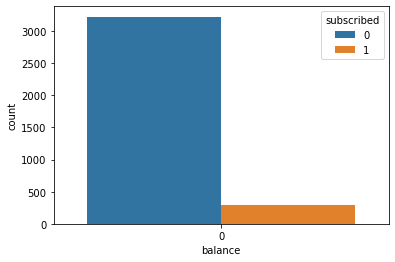

In [180]:
sns.countplot(df_zero_bal['balance'],hue=df['subscribed'])

#### Customers with 0 balance have a great tendency of not subscribing to the term deposit. 

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='balance'>

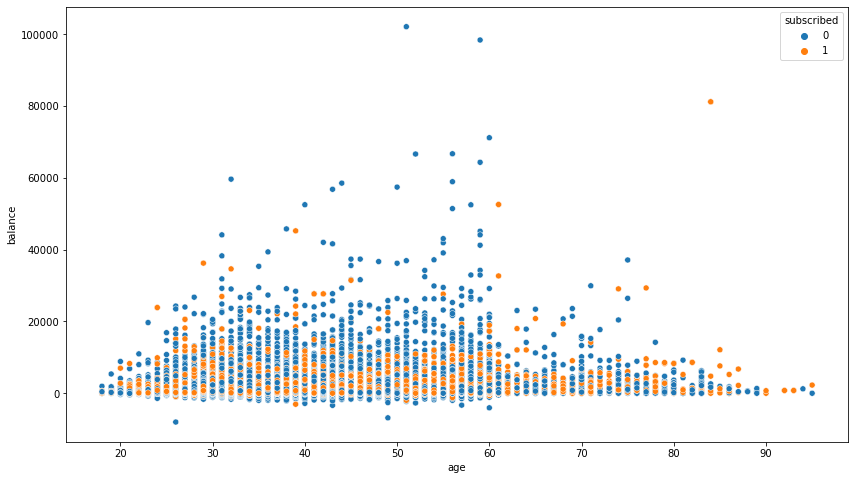

In [181]:
plt.figure(figsize=(14,8))
sns.scatterplot(df['age'],df['balance'],hue=df['subscribed'])

#### We can see that the orange dots(subscribed=Yes) are mixed with the blue dots(subscribed=No).

### 7.housing loan

In [182]:
df['housing']

0        yes
1        yes
2        yes
3        yes
4         no
        ... 
45206     no
45207     no
45208     no
45209     no
45210     no
Name: housing, Length: 45211, dtype: object

In [183]:
df['housing'].value_counts()

yes    25130
no     20081
Name: housing, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='housing', ylabel='count'>

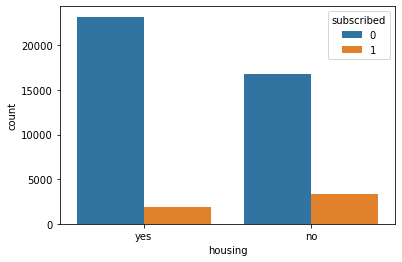

In [184]:
sns.countplot(df['housing'],hue=df['subscribed'])

#### Customers without housing loan have subscribed to term deposits while customers having a housing loan have a very less tendency to subscribe to the term deposits.

In [185]:
df_house_posbal=df[(df['balance']>0) & (df['housing']=='yes')]

In [186]:
df_house_posbal.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,0


In [187]:
df_house_posbal['subscribed'].value_counts()

0    19070
1     1664
Name: subscribed, dtype: int64

#### Clients with balance > 0 and having a housing loan have the above subscribed count

In [188]:
df_house_negbal=df[(df['balance']<0) & (df['housing']=='yes')]

In [189]:
df_house_negbal['subscribed'].value_counts()

0    2582
1     156
Name: subscribed, dtype: int64

#### Clients with balance < 0 and having a housing loan have the above subscribed count

In [190]:
df_house_zbal=df[(df['balance']==0) & (df['housing']=='yes')]

In [191]:
df_house_zbal['subscribed'].value_counts()

0    1543
1     115
Name: subscribed, dtype: int64

#### Clients with balance = 0 and having a housing loan have the above subscribed count

In [192]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='housing', ylabel='age'>

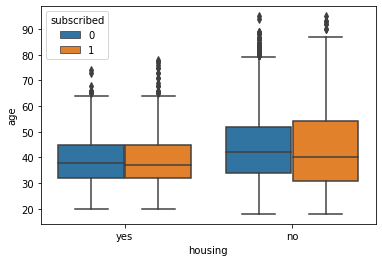

In [193]:
sns.boxplot(df['housing'],df['age'],hue=df['subscribed'])

#### Clients without any housing loan having subscribed to term deposits have majority of them within age 30-52/53.
#### Clients with housing loan having subscribed to term deposits have age within 32-45.

In [194]:
df_job_house=df[df['housing']=='yes']

In [195]:
df_job_house.shape

(25130, 17)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='job', ylabel='count'>

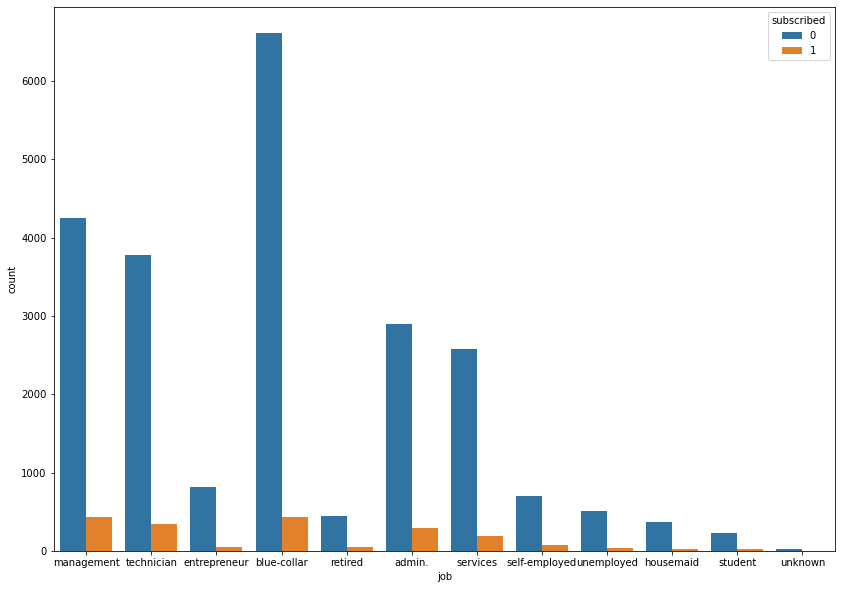

In [196]:
plt.figure(figsize=(14,10))
sns.countplot(df_job_house['job'],hue=df['subscribed'])

#### Clients with job in blue collar and management have greater subscriptions even with the housing loan.

In [197]:
df_job_house_no=df[df['housing']=='no']

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='job', ylabel='count'>

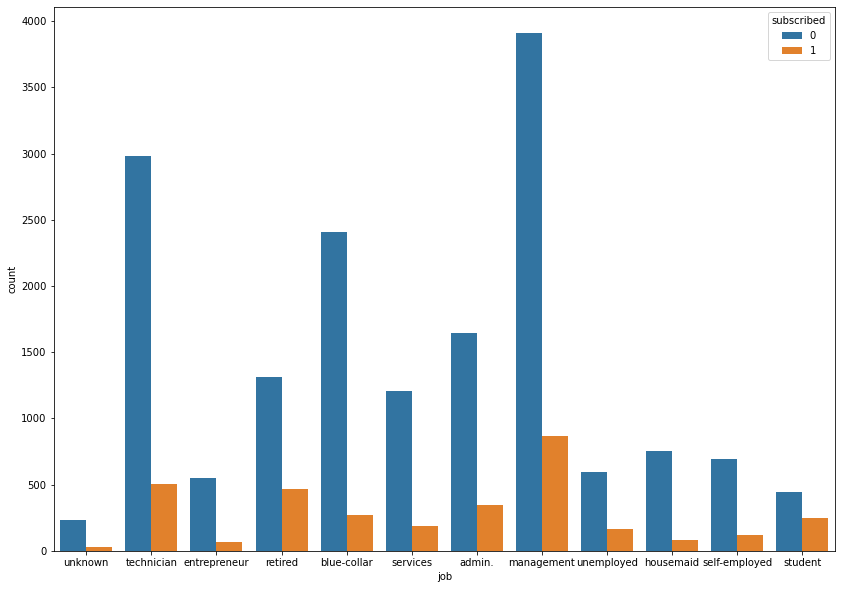

In [198]:
plt.figure(figsize=(14,10))
sns.countplot(df_job_house_no['job'],hue=df['subscribed'])

### Clients having job in management sector have a better tendency to subscribe to term deposits with or without the housing loan.So, the bank can come up with better policies for these clients.

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

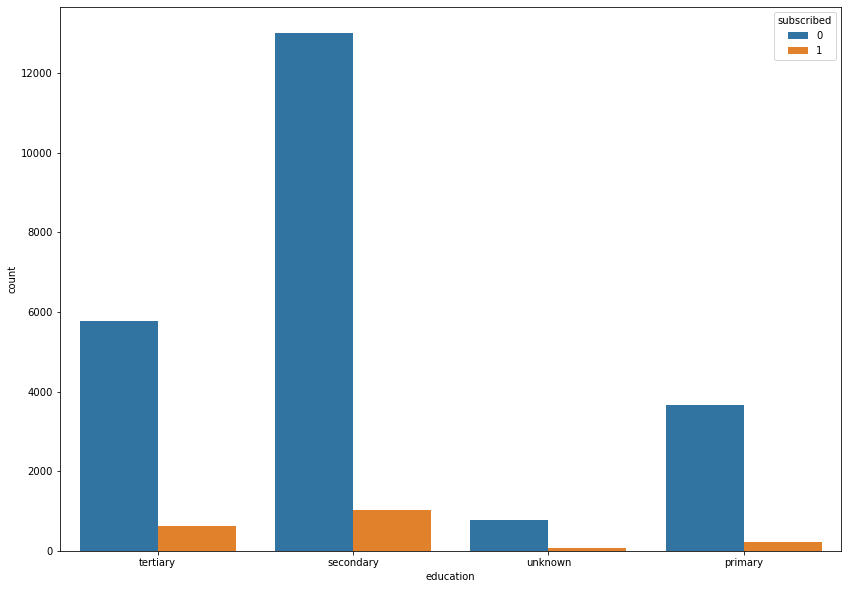

In [199]:
df_edu_house=df[df['housing']=='yes']
plt.figure(figsize=(14,10))
sns.countplot(df_job_house['education'],hue=df['subscribed'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='education', ylabel='count'>

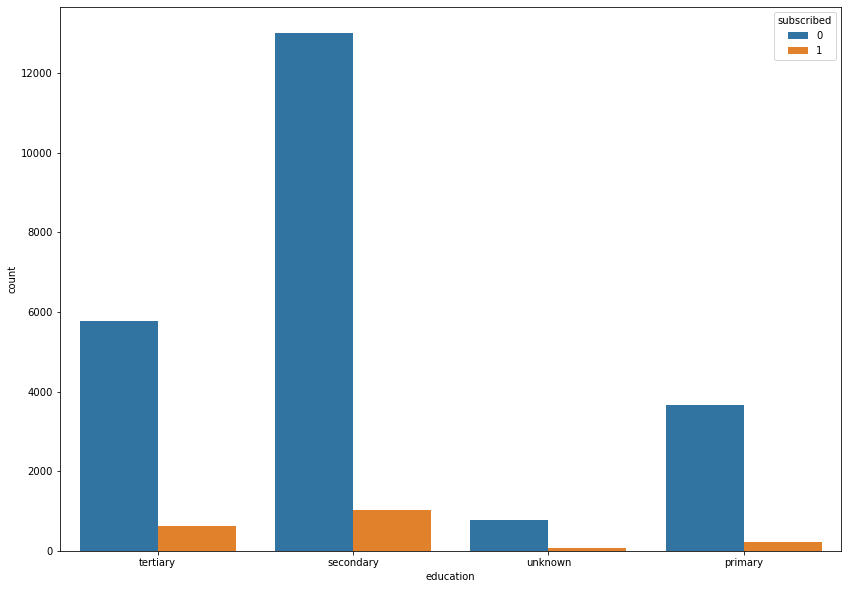

In [200]:
df_edu_house_no=df[df['housing']=='no']
plt.figure(figsize=(14,10))
sns.countplot(df_job_house['education'],hue=df['subscribed'])

In [201]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


### 7. personal loan

In [202]:
df['loan'].value_counts()

no     37967
yes     7244
Name: loan, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='loan', ylabel='count'>

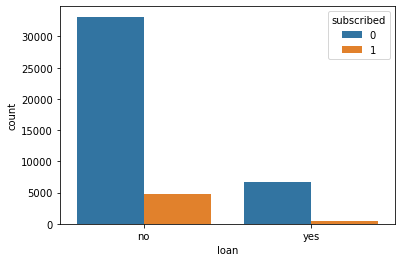

In [203]:
sns.countplot(df['loan'],hue=df['subscribed'])

#### People having personal loan have a low tendency of subscribing to term deposits

In [204]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


### 8. contact(cellular,telephone)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='contact', ylabel='count'>

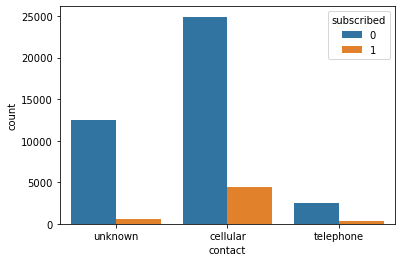

In [205]:
sns.countplot(df['contact'],hue=df['subscribed'])

#### Clients using cell phones have a greater tendency of answering the marketing call hence have a greater tendency of subscription to term deposits. 

### 10. month

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='month', ylabel='count'>

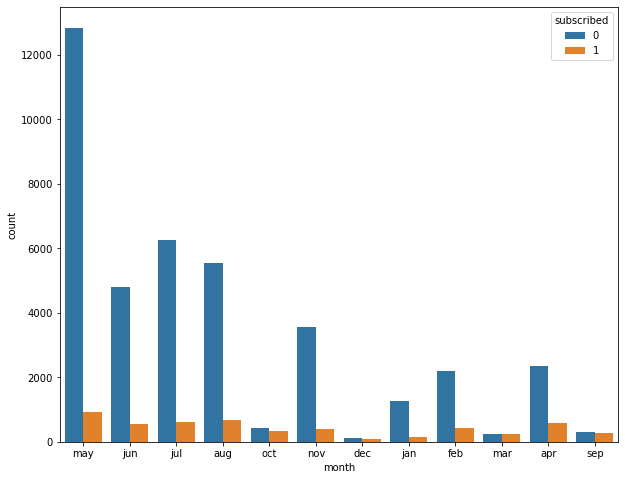

In [206]:
plt.figure(figsize=(10,8))
sns.countplot(df['month'],hue=df['subscribed'])

In [207]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,0


### 11. campaign (number of contacts performed in the campaign)

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='campaign'>

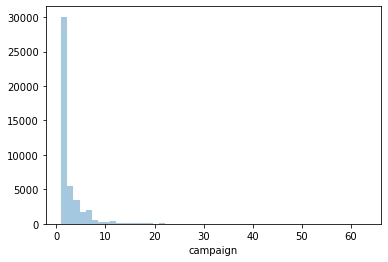

In [208]:
sns.distplot(df['campaign'],kde=False)

In [209]:
df['campaign'].max()

63

In [210]:
df['campaign'].min()

1

In [211]:
df[(df['campaign']==1) & (df['subscribed']==1)]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,1
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,1
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,1
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,1
388,56,management,married,tertiary,no,830,yes,yes,unknown,6,may,1201,1,-1,0,unknown,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45197,36,management,single,secondary,no,1511,yes,no,cellular,16,nov,270,1,-1,0,unknown,1
45201,53,management,married,tertiary,no,583,no,no,cellular,17,nov,226,1,184,4,success,1
45202,34,admin.,single,secondary,no,557,no,no,cellular,17,nov,224,1,-1,0,unknown,1
45203,23,student,single,tertiary,no,113,no,no,cellular,17,nov,266,1,-1,0,unknown,1


### 12. pdays(days since last contact from previous campaign)

In [212]:
df['pdays']

0         -1
1         -1
2         -1
3         -1
4         -1
        ... 
45206     -1
45207     -1
45208    184
45209     -1
45210    188
Name: pdays, Length: 45211, dtype: int64

In [213]:
df['pdays'].max()

871

In [214]:
df['pdays'].min()

-1

In [215]:
df['pdays'].value_counts()

-1      36954
 182      167
 92       147
 183      126
 91       126
        ...  
 749        1
 717        1
 589        1
 493        1
 32         1
Name: pdays, Length: 559, dtype: int64

### We have around 37k customers who have not been contacted in previous campaigns.

### 13. previous(no.of contacts before this campaign)

In [216]:
df['previous']

0         0
1         0
2         0
3         0
4         0
         ..
45206     0
45207     0
45208     3
45209     0
45210    11
Name: previous, Length: 45211, dtype: int64

In [217]:
df['previous'].max()

275

In [218]:
df['previous'].min()

0

In [219]:
df['previous'].value_counts()

0      36954
1       2772
2       2106
3       1142
4        714
5        459
6        277
7        205
8        129
9         92
10        67
11        65
12        44
13        38
15        20
14        19
17        15
16        13
19        11
23         8
20         8
22         6
18         6
24         5
27         5
29         4
25         4
21         4
30         3
28         2
26         2
37         2
38         2
55         1
40         1
35         1
58         1
51         1
41         1
32         1
275        1
Name: previous, dtype: int64

### This campaign has seen more new clients being contacted.

### 14. poutcome(output of previous campaign with 4 categories)

In [220]:
df['poutcome'].value_counts()

unknown    36959
failure     4901
other       1840
success     1511
Name: poutcome, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='poutcome', ylabel='count'>

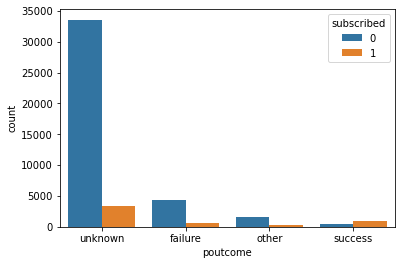

In [221]:
sns.countplot(df['poutcome'],hue=df['subscribed'])

#### In the previous campaign clients with successful subscription have a great tendency of subscribing again.

#### features with only 2 classes have been encoded using replace method of pandas(yes=1 and no=0)

In [222]:
df['housing'].replace({'yes':1,'no':0},inplace=True)
df['loan'].replace({'yes':1,'no':0},inplace=True)
df['default'].replace({'yes':1,'no':0},inplace=True)

In [223]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,0,2143,1,0,unknown,5,may,261,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,5,may,151,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,5,may,76,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,5,may,92,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,5,may,198,1,-1,0,unknown,0


### Duration, month and day are dropped as they are not adding much value to the result of subscription.

In [224]:
df.drop(['day','month','duration'],axis=1,inplace=True)

In [225]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,0,2143,1,0,unknown,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,1,-1,0,unknown,0
4,33,unknown,single,unknown,0,1,0,0,unknown,1,-1,0,unknown,0


### We have filtered the dataset by removing rows which have value unknown for majority of categorical features.

In [226]:
df_filtered=df[(df['job']=='unknown') & (df['education']=='unknown') & (df['contact']=='unknown') & (df['poutcome']=='unknown')].index

In [227]:
df_filtered

Int64Index([    4,   216,   354,   876,  2046,  2848,  3513,  3985,  4750,
             6966,  7181,  9002,  9010,  9058,  9093,  9166,  9235,  9370,
             9388,  9400,  9406,  9456,  9597,  9605,  9894, 10146, 10168,
            10207, 10220, 10343, 10394, 10635, 10867, 11062, 11154, 11208,
            11258, 11269, 11322, 11334, 11523, 11533, 11540, 11666, 11747,
            11752, 11812, 12085, 12147, 12187, 12203, 12218, 24081, 24175],
           dtype='int64')

In [228]:
df.shape

(45211, 14)

In [229]:
df1=df.copy()
df1.drop(df[(df['job']=='unknown') & (df['education']=='unknown') & (df['contact']=='unknown') & (df['poutcome']=='unknown')].index,inplace=True)

In [230]:
df1.shape

(45157, 14)

In [231]:
df1.head()


,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,0,2143,1,0,unknown,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,1,-1,0,unknown,0
5,35,management,married,tertiary,0,231,1,0,unknown,1,-1,0,unknown,0


### Majority of categorical features having unknown as their values are dropped(54 of them)

In [232]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,0,2143,1,0,unknown,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,1,-1,0,unknown,0
5,35,management,married,tertiary,0,231,1,0,unknown,1,-1,0,unknown,0


### Let us use the chi2 test to check the deependency of categorical features(input) on the dependent feature(subscribed).

In [233]:
from scipy.stats import chi2_contingency

### H0 : There is no relation between the features.
### H1 : There is relation between the features.

### Consider p-value = 0.05(threshold)

### We have the following categorical features to test against the dependent feature

### 1. job

In [234]:
job_chi=pd.crosstab(df1['job'],df1['subscribed'])
job_chi

subscribed,0,1
job,,
admin.,4540,631
blue-collar,9024,708
entrepreneur,1364,123
housemaid,1131,109
management,8157,1301
retired,1748,516
self-employed,1392,187
services,3785,369
student,669,269


In [235]:
chi_res=chi2_contingency(job_chi)

In [236]:
print('Chi2 statistic : {}'' p-value : {}'.format(chi_res[0],chi_res[1]))

Chi2 statistic : 836.6750076549868 p-value : 2.51785055942042e-172


#### We have p-value(job) less than 0.05 hence we can say that there is a relation between job and subscribed.

### 2. marital

In [237]:
marital_chi=pd.crosstab(df1['marital'],df1['subscribed'])
marital_chi

subscribed,0,1
marital,,
divorced,4581,622
married,24422,2754
single,10866,1912


In [238]:
chi_res=chi2_contingency(marital_chi)

In [239]:
print('Chi2 statistic : {}'' p-value : {}'.format(chi_res[0],chi_res[1]))

Chi2 statistic : 196.39366831550353 p-value : 2.2576508843394196e-43


#### marital will be included

### 3. education

In [240]:
edu_chi=pd.crosstab(df1['education'],df1['subscribed'])
edu_chi

subscribed,0,1
education,,
primary,6260,591
secondary,20752,2450
tertiary,11305,1996
unknown,1552,251


In [241]:
chi_res=chi2_contingency(edu_chi)

In [242]:
print('Chi2 statistic : {}'' p-value : {}'.format(chi_res[0],chi_res[1]))

Chi2 statistic : 241.0321179614532 p-value : 5.6925762217261e-52


#### education will be included.

### 4. contact 

In [243]:
contact_chi=pd.crosstab(df1['contact'],df1['subscribed'])
contact_chi

subscribed,0,1
contact,,
cellular,24916,4369
telephone,2516,390
unknown,12437,529


In [244]:
chi_res=chi2_contingency(contact_chi)

In [245]:
print('Chi2 statistic : {}'' p-value : {}'.format(chi_res[0],chi_res[1]))

Chi2 statistic : 1029.9989509882575 p-value : 2.180567876176703e-224


#### contact will be included.

### 5. poutcome

In [246]:
pout_chi=pd.crosstab(df1['poutcome'],df1['subscribed'])
pout_chi

subscribed,0,1
poutcome,,
failure,4283,618
other,1533,307
success,533,978
unknown,33520,3385


In [247]:
chi_res=chi2_contingency(pout_chi)

In [248]:
print('Chi2 statistic : {}'' p-value : {}'.format(chi_res[0],chi_res[1]))

Chi2 statistic : 4385.400666892608 p-value : 0.0


#### poutcome will be included.

In [249]:
df1.head()

,age,job,marital,education,default,balance,housing,loan,contact,campaign,pdays,previous,poutcome,subscribed
0,58,management,married,tertiary,0,2143,1,0,unknown,1,-1,0,unknown,0
1,44,technician,single,secondary,0,29,1,0,unknown,1,-1,0,unknown,0
2,33,entrepreneur,married,secondary,0,2,1,1,unknown,1,-1,0,unknown,0
3,47,blue-collar,married,unknown,0,1506,1,0,unknown,1,-1,0,unknown,0
5,35,management,married,tertiary,0,231,1,0,unknown,1,-1,0,unknown,0


### 6. default

In [250]:
default_chi=pd.crosstab(df1['default'],df1['subscribed'])
default_chi

subscribed,0,1
default,,
0,39107,5236
1,762,52


In [251]:
chi_res=chi2_contingency(default_chi)

In [252]:
print('Chi2 statistic : {}'' p-value : {}'.format(chi_res[0],chi_res[1]))

Chi2 statistic : 22.18821135220075 p-value : 2.471868946524507e-06


#### default will be included.

### 7. housing

In [253]:
housing_chi=pd.crosstab(df1['housing'],df1['subscribed'])
housing_chi

subscribed,0,1
housing,,
0,16679,3353
1,23190,1935


In [254]:
chi_res=chi2_contingency(housing_chi)

In [255]:
print('Chi2 statistic : {}'' p-value : {}'.format(chi_res[0],chi_res[1]))

Chi2 statistic : 879.4671800936153 p-value : 2.8540801072439307e-193


#### housing will be included.

### 8. loan

In [256]:
loan_chi=pd.crosstab(df1['loan'],df1['subscribed'])
loan_chi

subscribed,0,1
loan,,
0,33109,4804
1,6760,484


In [257]:
chi_res=chi2_contingency(loan_chi)

In [258]:
print('Chi2 statistic : {}'' p-value : {}'.format(chi_res[0],chi_res[1]))

Chi2 statistic : 210.46773021077627 p-value : 1.0859775813691408e-47


#### loan will be included

### We can see that all variables are satisfying the threshold for p-value hence, we will have to consider all variables.

### Perform one hot encoding on categorical features

In [259]:
df1.drop(['marital','education','default','loan'],axis=1,inplace=True)

In [260]:
df1.drop(['pdays'],axis=1,inplace=True)

In [261]:
df1.head()

,age,job,balance,housing,contact,campaign,previous,poutcome,subscribed
0,58,management,2143,1,unknown,1,0,unknown,0
1,44,technician,29,1,unknown,1,0,unknown,0
2,33,entrepreneur,2,1,unknown,1,0,unknown,0
3,47,blue-collar,1506,1,unknown,1,0,unknown,0
5,35,management,231,1,unknown,1,0,unknown,0


In [262]:
df1.to_csv('term_deposit_cleaned.csv')

In [269]:
df1=pd.get_dummies(df1,columns=['job','contact','poutcome'])

In [270]:
df1.head()

,age,balance,housing,campaign,previous,subscribed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,44,29,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
2,33,2,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,47,1506,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
5,35,231,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [127]:
pd.set_option('display.max_columns',None)

In [138]:
df1.shape[0]

45157

In [128]:
df1.isnull().sum()

age                  0
balance              0
housing              0
campaign             0
previous             0
subscribed           0
job_admin.           0
job_blue-collar      0
job_entrepreneur     0
job_housemaid        0
job_management       0
job_retired          0
job_self-employed    0
job_services         0
job_student          0
job_technician       0
job_unemployed       0
job_unknown          0
contact_cellular     0
contact_telephone    0
contact_unknown      0
poutcome_failure     0
poutcome_other       0
poutcome_success     0
poutcome_unknown     0
dtype: int64

In [271]:
df1.dtypes

age                  int64
balance              int64
housing              int64
campaign             int64
previous             int64
subscribed           int64
job_admin.           uint8
job_blue-collar      uint8
job_entrepreneur     uint8
job_housemaid        uint8
job_management       uint8
job_retired          uint8
job_self-employed    uint8
job_services         uint8
job_student          uint8
job_technician       uint8
job_unemployed       uint8
job_unknown          uint8
contact_cellular     uint8
contact_telephone    uint8
contact_unknown      uint8
poutcome_failure     uint8
poutcome_other       uint8
poutcome_success     uint8
poutcome_unknown     uint8
dtype: object

In [129]:
df1.shape

(45157, 25)

In [130]:
df1.head()

,age,balance,housing,campaign,previous,subscribed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1
1,44,29,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1
2,33,2,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
3,47,1506,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1
5,35,231,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1


In [131]:
### Balance removed
df1.drop(['balance'],axis=1,inplace=True)

In [133]:
print(df1['age'].min())
print(df1['age'].max())

18
95


In [135]:
df['job'].value_counts()

blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64

In [ ]:
df['']

### Correlation matrix

(9.0, 0.0)

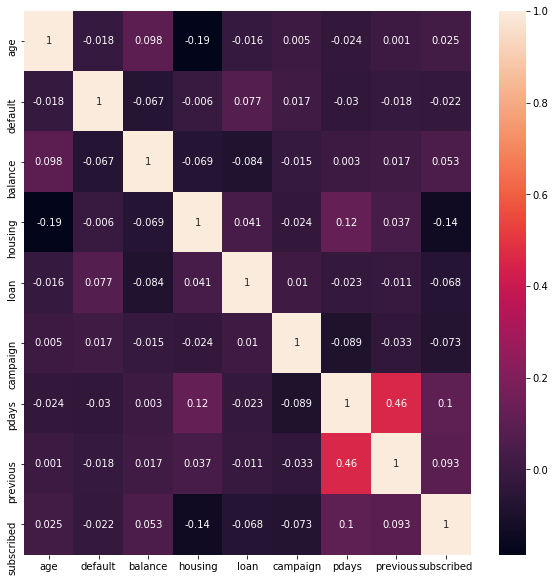

In [127]:
corr=df.corr().round(3)
plt.subplots(figsize=(10,10))
ax=sns.heatmap(corr,annot=True)
bottom,top=ax.get_ylim()
ax.set_ylim(bottom+0.5,top-0.5)

### All the features are independent as observed from correlation matrix. All values are between 0 and 0.5

In [264]:
X=df1.drop('subscribed',axis=1)

In [265]:
y=df1['subscribed']

In [266]:
X

,age,job,balance,housing,contact,campaign,previous,poutcome
0,58,management,2143,1,unknown,1,0,unknown
1,44,technician,29,1,unknown,1,0,unknown
2,33,entrepreneur,2,1,unknown,1,0,unknown
3,47,blue-collar,1506,1,unknown,1,0,unknown
5,35,management,231,1,unknown,1,0,unknown
...,...,...,...,...,...,...,...,...
45206,51,technician,825,0,cellular,3,0,unknown
45207,71,retired,1729,0,cellular,2,0,unknown
45208,72,retired,5715,0,cellular,5,3,success
45209,57,blue-collar,668,0,telephone,4,0,unknown


In [268]:
X.dtypes

age          int64
job         object
balance      int64
housing      int64
contact     object
campaign     int64
previous     int64
poutcome    object
dtype: object

In [269]:
y

0        0
1        0
2        0
3        0
5        0
        ..
45206    1
45207    1
45208    1
45209    0
45210    0
Name: subscribed, Length: 45157, dtype: int64

### Building model

In [270]:
df1['subscribed'].value_counts()

0    39869
1     5288
Name: subscribed, dtype: int64

### We can see that we have an imbalanced dataset.
### As our dataset is not very large we have used oversampling.
### SMOTE(Synthetic Minority Oversampling Technique) is the technique used here to oversample the data.

### Splitting into training and test data

In [272]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,stratify=y,random_state=0)

In [276]:
X_train_df=pd.DataFrame(X_train)
X_train_df.head()

,age,job,balance,housing,contact,campaign,previous,poutcome
35436,28,blue-collar,553,1,cellular,3,3,failure
232,57,entrepreneur,294,1,unknown,2,0,unknown
15292,46,self-employed,567,0,cellular,10,0,unknown
33186,35,blue-collar,365,1,cellular,2,0,unknown
20880,39,blue-collar,52,0,cellular,1,0,unknown


In [279]:
y_train_count=pd.DataFrame(y_train)
y_train_count[].head(50)

,subscribed
35436,0
232,0
15292,0
33186,0
20880,0
25714,0
9350,0
36145,0
6047,0
6997,0


### SMOTE for oversampling

In [135]:
from imblearn.over_sampling import SMOTE

In [136]:
smote=SMOTE(random_state=12,sampling_strategy=0.14)
X_sm_os,y_sm_os=smote.fit_sample(X_train,y_train)

In [137]:
y_sm_count=pd.DataFrame(y_sm_os)
y_sm_count[0].value_counts()

0    27908
1     3907
Name: 0, dtype: int64

### Sampling strategy 2

In [317]:
# Use sampling techniques to balance our data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
over = SMOTE(sampling_strategy=0.3)
under = RandomUnderSampler(sampling_strategy=0.5)

#Build Pipeline to perform sampling
from imblearn.pipeline import Pipeline
steps = [('o',over),('u',under)]
pipeline=Pipeline(steps=steps)
#
X_train_s1,y_train_s1=pipeline.fit_resample(X_train,y_train)

In [318]:
from collections import Counter
counter_b = Counter(y_train)
counter_a = Counter(y_train_s1)
print('Before sampling: ',counter_b)
print('After sampling: ',counter_a)

Before sampling:  Counter({0: 27908, 1: 3701})
After sampling:  Counter({0: 16744, 1: 8372})


### Import Libraries for metrics for classification

In [284]:
from sklearn.metrics import confusion_matrix,precision_score,recall_score,classification_report,plot_roc_curve

### 1. Decision Tree

In [139]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(criterion='entropy',random_state=0)

In [140]:
dt.fit(X_sm_os,y_sm_os)
y_dt_pred=dt.predict(X_test)


In [141]:
print(confusion_matrix(y_test,y_dt_pred))
print('Precision score: ',precision_score(y_test,y_dt_pred))
print('Recall score: ',recall_score(y_test,y_dt_pred))
print(classification_report(y_test,y_dt_pred))

[[10633  1328]
 [ 1115   472]]
Precision score:  0.26222222222222225
Recall score:  0.297416509136736
              precision    recall  f1-score   support

           0       0.91      0.89      0.90     11961
           1       0.26      0.30      0.28      1587

    accuracy                           0.82     13548
   macro avg       0.58      0.59      0.59     13548
weighted avg       0.83      0.82      0.82     13548



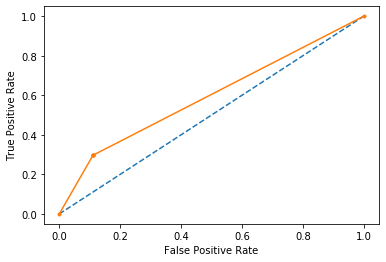

In [142]:
from sklearn.metrics import roc_curve
dt.fit(X_sm_os,y_sm_os)
y_dt_pred=dt.predict_proba(X_test)
y_dt_pred=y_dt_pred[:,1]
fpr1,tpr1,thresholds=roc_curve(y_test,y_dt_pred)
plt.plot([0,1],[0,1],linestyle='--',label='No skill')
plt.plot(fpr1,tpr1,marker='.',label='Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### 2. Random Forest 

In [275]:
from sklearn.ensemble import RandomForestClassifier

In [144]:
rf_os=RandomForestClassifier(n_estimators=300,criterion='entropy',random_state=16)

In [145]:
rf_os.fit(X_sm_os,y_sm_os)
y_rf_pred=rf_os.predict(X_test)

In [353]:
# Model 2
term_clf=RandomForestClassifier(n_estimators=300,criterion='entropy',max_depth=10,random_state=24)

In [354]:
term_clf.fit(X_train_s1,y_train_s1)
y_rfss2_pred=term_clf.predict(X_test)

In [146]:
print(confusion_matrix(y_test,y_rf_pred))
print('Precision score: ',precision_score(y_test,y_rf_pred))
print('Recall score: ',recall_score(y_test,y_rf_pred))
print(classification_report(y_test,y_rf_pred))

[[11635   326]
 [ 1254   333]]
Precision score:  0.5053110773899848
Recall score:  0.20982986767485823
              precision    recall  f1-score   support

           0       0.90      0.97      0.94     11961
           1       0.51      0.21      0.30      1587

    accuracy                           0.88     13548
   macro avg       0.70      0.59      0.62     13548
weighted avg       0.86      0.88      0.86     13548



[[11208   753]
 [ 1039   548]]
Precision score:  0.42121445042275174
Recall score:  0.34530560806553245
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     11961
           1       0.42      0.35      0.38      1587

    accuracy                           0.87     13548
   macro avg       0.67      0.64      0.65     13548
weighted avg       0.86      0.87      0.86     13548



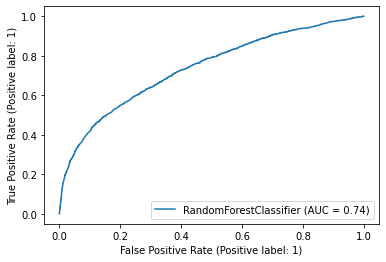

In [355]:
print(confusion_matrix(y_test,y_rfss2_pred))
print('Precision score: ',precision_score(y_test,y_rfss2_pred))
print('Recall score: ',recall_score(y_test,y_rfss2_pred))
print(classification_report(y_test,y_rfss2_pred))
plot_roc_curve(rf_ss2,X_test,y_test)

In [349]:
### Save the model
import pickle
pickle.dump(term_clf,open('term_rf.pkl', 'wb'))

### GridSearch CV has been used for tuning the RandomForest Classifier model.

In [147]:
from sklearn.model_selection import GridSearchCV

In [148]:
from sklearn.metrics import SCORERS

In [149]:
SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'neg_root_mean_squared_error', 'neg_mean_poisson_deviance', 'neg_mean_gamma_deviance', 'accuracy', 'top_k_accuracy', 'roc_auc', 'roc_auc_ovr', 'roc_auc_ovo', 'roc_auc_ovr_weighted', 'roc_auc_ovo_weighted', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'neg_brier_score', 'adjusted_rand_score', 'rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_wei

### Scoring used is precision as we want to focus more on the positive class ie subscribed=yes

In [279]:
n_estimators = [100, 300, 500, 800]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 2, 5, 10] 
score=['precision']
hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(rf_os, hyperF, cv = 3, verbose = 1,scoring='precision' ,
                      n_jobs = -1)
bestF = gridF.fit(X_sm_os, y_sm_os)

Fitting 3 folds for each of 320 candidates, totalling 960 fits


In [281]:
gridF.best_params_

{'max_depth': 5,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 300}

In [282]:
gridF.best_score_

0.7424442420921401

### Random Forest with the above parameters.

In [150]:
rf_os1=RandomForestClassifier(n_estimators=300,max_depth=5,min_samples_leaf=2,min_samples_split=10,criterion='entropy',random_state=16)

In [151]:
rf_os1.fit(X_sm_os,y_sm_os)
y_rf1_pred=rf_os1.predict(X_test)

In [153]:
print(confusion_matrix(y_test,y_rf1_pred))
print('Precision score: ',precision_score(y_test,y_rf1_pred))
print('Recall score: ',recall_score(y_test,y_rf1_pred))
print(classification_report(y_test,y_rf1_pred))

[[11855   106]
 [ 1378   209]]
Precision score:  0.6634920634920635
Recall score:  0.13169502205419029
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     11961
           1       0.66      0.13      0.22      1587

    accuracy                           0.89     13548
   macro avg       0.78      0.56      0.58     13548
weighted avg       0.87      0.89      0.86     13548



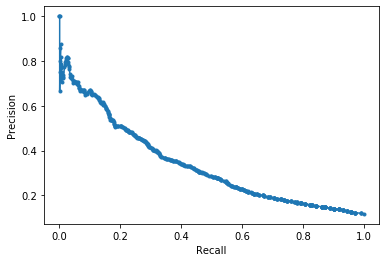

In [168]:
from sklearn.metrics import precision_recall_curve
rf_os.fit(X_sm_os,y_sm_os)
y_rf_pred=rf_os.predict_proba(X_test)
y_rf_pred=y_rf_pred[:,1]          # probabibility of class=1
precision1,recall1,_=precision_recall_curve(y_test,)
#plt.plot([0,1],[0,1],linestyle='--',label='No skill')
plt.plot(recall1,precision1,marker='.',label='Random Forest')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

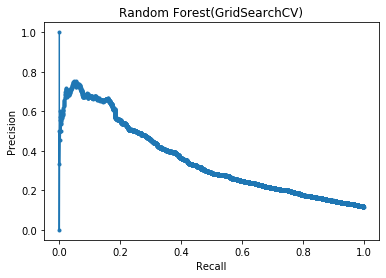

In [180]:
rf_os1.fit(X_sm_os,y_sm_os)
y_rf1_pred=rf_os1.predict_proba(X_test)
y_rf1_pred=y_rf1_pred[:,1]          # probabibility of class=1
precision2,recall2,_= precision_recall_curve(y_test,y_rf1_pred)
#plt.plot([0,1],[0,1],linestyle='--',label='No skill')
plt.plot(recall2,precision2,marker='.')
plt.title('Random Forest(GridSearchCV)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

### 3. K Nearest Neighbors

In [152]:
from sklearn.neighbors import KNeighborsClassifier
knn= KNeighborsClassifier(n_neighbors=7,p=2,metric='minkowski')


In [153]:
from sklearn.preprocessing import MinMaxScaler
m_sc=MinMaxScaler()
X_sm_os_sc=m_sc.fit_transform(X_sm_os)
X_test_sc=m_sc.transform(X_test)

In [154]:
knn.fit(X_sm_os_sc,y_sm_os)
y_knn_pred=knn.predict(X_test_sc)

In [155]:
print(confusion_matrix(y_test,y_knn_pred))
print('Precision score: ',precision_score(y_test,y_knn_pred))
print('Recall score: ',recall_score(y_test,y_knn_pred))
print(classification_report(y_test,y_knn_pred))

[[11682   279]
 [ 1294   293]]
Precision score:  0.5122377622377622
Recall score:  0.18462507876496534
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11961
           1       0.51      0.18      0.27      1587

    accuracy                           0.88     13548
   macro avg       0.71      0.58      0.60     13548
weighted avg       0.85      0.88      0.86     13548



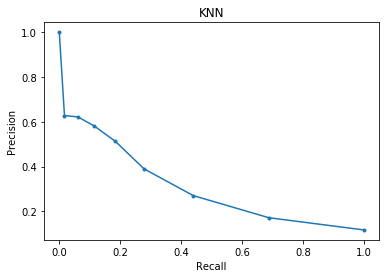

In [188]:
knn.fit(X_sm_os_sc,y_sm_os)
y_knn_pred1=knn.predict_proba(X_test_sc)
y_knn_pred1=y_knn_pred1[:,1]          # probabibility of class=1
precision3,recall3,_= precision_recall_curve(y_test,y_knn_pred1)
#plt.plot([0,1],[0,1],linestyle='--',label='No skill')
plt.plot(recall3,precision3,marker='.')
plt.title('KNN')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.show()

In [156]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
pred=[]
for model in [rf_os1,knn]:
    pred.append(pd.Series(model.predict_proba(X_test_sc)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('ROC-AUC score: {}'.format(roc_auc_score(y_test,final_prediction)))

ROC-AUC score: 0.7158901274763649


In [157]:
pd.concat(pred,axis=1)

,0,1
0,0.121955,0.285714
1,0.122093,0.000000
2,0.427217,1.000000
3,0.134818,0.285714
4,0.095974,0.000000
...,...,...
13543,0.385531,0.857143
13544,0.092637,0.000000
13545,0.159693,0.142857
13546,0.174932,0.142857


In [158]:
final_prediction

0        0.203835
1        0.061046
2        0.713608
3        0.210266
4        0.047987
           ...   
13543    0.621337
13544    0.046318
13545    0.151275
13546    0.158895
13547    0.293601
Length: 13548, dtype: float64

In [160]:
fpr,tpr,thresholds=roc_curve(y_test,final_prediction)
print(thresholds)

[1.7168301  0.7168301  0.71475671 ... 0.02598615 0.02594071 0.02580964]


In [165]:
from sklearn.metrics import precision_score
precision_list=[]
for thres in thresholds:
    y_pred_t=np.where(final_prediction>thres,1,0)
    precision_list.append(precision_score(y_test,y_pred_t))
precision_list=pd.concat([pd.Series(thresholds),pd.Series(precision_list)],axis=1)
precision_list.columns=['Thresholds','Precision']
precision_list.sort_values(by='Precision',ascending=False,inplace=True)
precision_list.head()

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,Thresholds,Precision
32,0.623426,0.678261
47,0.567479,0.674847
49,0.567259,0.674699
46,0.567911,0.672840
50,0.565216,0.672619


### Our dataset represents a marketing task in which the bank will call up the customers for for a term subscription.
### The bank will target the customers/clients which have a greater chance of subscribing for the term deposit.
### As the dataset was imbalanced we cannot use accuracy as a performance metric for evaluation.
### Hence, we will use precision as a metric for evaluation as positive class(subscribed=YES) is of greater importance.
### By comparing the 3 algorithms used above, we can observe that RandomForest algorithm gives us the highest precision score.

In [138]:
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,Dropout

Using TensorFlow backend.


In [139]:
## Initialize ANN
classifier=Sequential()


In [141]:
print(X_sm_os.shape)
print(y_sm_os.shape)

(31815, 29)
(31815,)


In [155]:
from sklearn.preprocessing import MinMaxScaler
Ann_sc=MinMaxScaler()
X_sm_os_sc=Ann_sc.fit_transform(X_sm_os)

In [159]:
classifier.add((Dense(units=15,kernel_initializer='he_uniform',activation='relu',input_dim=29)))
## create 2nd hidden layer
classifier.add(Dense(units=15,kernel_initializer='he_uniform',activation='relu'))
## Create 3rd hidden layer
classifier.add(Dense(units=15,kernel_initializer='he_uniform',activation='relu'))
## Add output layer
classifier.add(Dense(units=1,kernel_initializer='glorot_uniform',activation='sigmoid'))
## Compiling the ANN
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=[keras.metrics.Precision()])

In [160]:
model=classifier.fit(X_sm_os_sc,y_sm_os,validation_split=0.33,batch_size=2048,epochs=100)

Train on 21316 samples, validate on 10499 samples
Epoch 1/100
21316/21316 [==============================] - 4s 167us/step - loss: 0.7130 - precision_6: 0.1196 - val_loss: 0.6939 - val_precision_6: 0.1293
Epoch 2/100
21316/21316 [==============================] - 0s 9us/step - loss: 0.6861 - precision_6: 0.1108 - val_loss: 0.6812 - val_precision_6: 0.0000e+00
Epoch 3/100
21316/21316 [==============================] - 0s 9us/step - loss: 0.6771 - precision_6: 0.0000e+00 - val_loss: 0.6722 - val_precision_6: 0.0000e+00
Epoch 4/100
21316/21316 [==============================] - 0s 9us/step - loss: 0.6677 - precision_6: 0.0000e+00 - val_loss: 0.6635 - val_precision_6: 0.0000e+00
Epoch 5/100
21316/21316 [==============================] - 0s 9us/step - loss: 0.6585 - precision_6: 0.0000e+00 - val_loss: 0.6538 - val_precision_6: 0.0000e+00
Epoch 6/100
21316/21316 [==============================] - 0s 9us/step - loss: 0.6478 - precision_6: 0.0000e+00 - val_loss: 0.6425 - val_precision_6: 0.000

KeyboardInterrupt: 